<font color='DarkBlue' size=+2><b>Комментарий ревьюера</b></font><br>
<font color='DarkBlue'>Привет, Дмитрий! <br>Меня зовут Олег Мазуренко, и я буду проверять этот проект. Спасибо за проделанную работу! <br>Ко мне можно обращаться на «ты». Как мне обращаться, напиши.</font><br>
<font color='DarkBlue'>Я буду использовать различные цвета, чтобы было удобнее воспринимать мои комментарии:</font><br>
<font color='DarkBlue'>Синий текст &mdash; просто текст комментария.</font><br>
<font color='DarkGreen'>👌 Зеленый текст &mdash; все отлично.</font><br>
<font color='DarkMagenta'>👉 Фиолетовый текст &mdash; сделано все правильно, однако есть рекомендации, на что стоит обратить внимание. Реализованные рекомендации позволят нам наработать опыт решения задачи разными способами или посмотреть на задачу под иным углом.</font><br>
<font color='Red'>🛠 Красный текст &mdash; есть недочеты, они иногда бывают. </font><br><font color='DarkBlue'>Любая ошибка это возможность посмотреть на задачу с другой стороны и освоить новые знания, по этому не надо расстраиваться, если они есть.</font><br>
<font color='DarkBlue'>Обращаю внимание, что комментарии ревьюера после проверки удалять нельзя они помогают отследить логику исправления или изменения проекта. Это дополнительный навык при обучении. Свой исправляемый код лучше тоже не удалять, а ремить #, это позволит акцентировать изменения в ходе подготовки окончательного варианта проекта.<br>
Ответы на мои комментарии лучше тоже помечать. 
Например: </font><font color='Blue'><b>Комментарий студента</b></font><br>
<font color='DarkBlue'><b>Теперь посмотрим, что у нас получилось!</b></font>

<font color='Blue'>Олег, списибо за замечания. Мне комфортно общаться на "ты". 

Проект начинаю писать по заготовленному шаблону, и промогал заполнить начальные поля. =(

Исправил.


</font>

#### СБОРНЫЙ ПРОЕКТ №1 "Исследование рынка видеоигр"

В рамках данного проекта я обработаю, проанализирую и исследую полученные данные от интернет-магазина «Стримчик», который продаёт по всему миру видеоигры. Так же будут проведены проверки высказанных предположений.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 Любой проект, как учебный, так и реальный, начинается с его описания, содержащего: описание контекста, цель и краткий план исследования. Надо его написать. Просто задание проекта изложить своими словами.</font>

Импортирую библиотеки и задаю параметры

In [172]:
import pandas as pd
from scipy import stats as st
import seaborn as sns
import matplotlib.pyplot as plt
from statistics import mean 
import math
pd.options.display.max_info_rows = 11

Загружаю данные из файла

In [173]:
try:
    data=pd.read_csv('c:/ps/project/datasets/games.csv')
except:
    data=pd.read_csv('/datasets/games.csv')

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Очень хорошо, что используется код двойной загрузки, локально и с сервера. Часто в проектах возникают ошибки именно из-за не правильного пути к датасету.</font>

Изучаю содержимое загруженных данных

In [174]:
display(data.head(10))
print(data.describe())
#pd.set_option("max_rows", None)
print(data.info())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


       Year_of_Release      NA_sales      EU_sales      JP_sales  \
count     16446.000000  16715.000000  16715.000000  16715.000000   
mean       2006.484616      0.263377      0.145060      0.077617   
std           5.877050      0.813604      0.503339      0.308853   
min        1980.000000      0.000000      0.000000      0.000000   
25%        2003.000000      0.000000      0.000000      0.000000   
50%        2007.000000      0.080000      0.020000      0.000000   
75%        2010.000000      0.240000      0.110000      0.040000   
max        2016.000000     41.360000     28.960000     10.220000   

        Other_sales  Critic_Score  
count  16715.000000   8137.000000  
mean       0.047342     68.967679  
std        0.186731     13.938165  
min        0.000000     13.000000  
25%        0.000000     60.000000  
50%        0.010000     71.000000  
75%        0.030000     79.000000  
max       10.570000     98.000000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries

Данные загружены в таблицу и проанализированы. 

Таблица состоит из 11 столбцов и 16715 строк. Некоторые столбцы не соответствуют формату хранимых данных.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 И где вывод?</font>

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 Просмотрел весь раздел, но не нашел проверки явных дубликатов. Если мы это сделали, но потом код удалили, то это не совсем правильно, пусть все знают, что мы тщательно анализируем данные.</font><br>
<font color='Red'>🛠 Так же не произведена проверка неявных дубликатов и не принято решение по их обработке. Данная проверка является составной частью первичного анализа данных. Проверять лучше по имени, платформе и году релиза одновременно.</font>

##### Подготовка данных

Проверяю на явные и не явные дуюликаты.

In [175]:
print(f"Явных дубликатов найдено: {data.duplicated().sum()}.")
print(f"Не явных дубликатов найдено: {data.duplicated(subset=['Name', 'Platform','Year_of_Release']).sum()}.")
print("Удаляю не явные дубликаты.")
data = data.drop_duplicates(subset=['Name', 'Platform','Year_of_Release'])
print(f"Не явных дубликатов отсалось: {data.duplicated(subset=['Name', 'Platform','Year_of_Release']).sum()}.")
display(data['Rating'].value_counts().sort_index())

Явных дубликатов найдено: 0.
Не явных дубликатов найдено: 2.
Удаляю не явные дубликаты.
Не явных дубликатов отсалось: 0.


Rating
AO         1
E       3989
E10+    1420
EC         8
K-A        3
M       1563
RP         3
T       2961
Name: count, dtype: int64

Дубликаты явные и неявные удалены.

В столбце "Rating" я заменю старое название рейтинга "К-А" на действующее "Е"

In [176]:
data.loc[data['Rating'] == 'K-A', 'Rating'] = 'E'

<font color='Blue'>Замечание по дубликатам отработал.</font>

Заменяю названия столбцов приводя их к нижнему регистру.

In [177]:
display(data.columns)
data.columns = data.columns.str.lower()
display(data.columns)


Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Молодец! 👍 Иногда пишут длинный словарь для замены колонок, как в проекте по музыке.</font>

Названия столбцов переведены в нижний регистр.

Преобразую типы данных в столбцах Year_of_Release к int64 и User_Score к float64

In [178]:
print(f"Данные без указания года составляют {round((len(data.loc[data['year_of_release'].isnull()]) / len(data) *100), 1)}%") #подсчитываю % пропусков в столбце year_of_release

Данные без указания года составляют 1.6%


Удаляю строки в которых не указан год выхода.

Записи 'tbd' и пропуски в столбце 'user_score' заменю на -1. 

In [179]:
data = data.dropna(subset='year_of_release')
display(len(data.loc[data['year_of_release'].isnull()]) / len(data) *100)
#print(data['year_of_release']. isnull ().count()) #Проверяю наличие пропусков в столбце, релиза даты, чтобы не было пустых данных.
print(data['user_score'].sort_values().unique())
data['user_score'] = data['user_score'].replace('tbd', -1)
data['user_score'] = data['user_score'].fillna(-1)
data = data.astype({'year_of_release': 'int', 'user_score' :'float'})
print(data['user_score'].sort_values().unique())

0.0

['0' '0.2' '0.3' '0.5' '0.6' '0.7' '0.9' '1' '1.1' '1.2' '1.3' '1.4' '1.5'
 '1.6' '1.7' '1.8' '1.9' '2' '2.1' '2.2' '2.3' '2.4' '2.5' '2.6' '2.7'
 '2.8' '2.9' '3' '3.1' '3.2' '3.3' '3.4' '3.5' '3.6' '3.7' '3.8' '3.9' '4'
 '4.1' '4.2' '4.3' '4.4' '4.5' '4.6' '4.7' '4.8' '4.9' '5' '5.1' '5.2'
 '5.3' '5.4' '5.5' '5.6' '5.7' '5.8' '5.9' '6' '6.1' '6.2' '6.3' '6.4'
 '6.5' '6.6' '6.7' '6.8' '6.9' '7' '7.1' '7.2' '7.3' '7.4' '7.5' '7.6'
 '7.7' '7.8' '7.9' '8' '8.1' '8.2' '8.3' '8.4' '8.5' '8.6' '8.7' '8.8'
 '8.9' '9' '9.1' '9.2' '9.3' '9.4' '9.5' '9.6' '9.7' 'tbd' nan]
[-1.   0.   0.2  0.3  0.5  0.6  0.7  0.9  1.   1.1  1.2  1.3  1.4  1.5
  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7  2.8  2.9
  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1  4.2  4.3
  4.4  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5  5.6  5.7
  5.8  5.9  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9  7.   7.1
  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3  8.4  8.5
  8.6

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Зачем заглушка на значения года выпуска игр? Весь анализ строится на динамике по годам. Далее следует определить актуальный период, который и будет исследоваться. Надо оценить % пропусков и принять правильное решение. Удалить напрочь.</font>
<br><font color='Red'>🛠 Правильный подход к замене 'tbd' и пропусков заглушкой. Но ошибка заключается в том, что данное значение заглушки входит в диапазон значений колонки отзывов пользователей, что не допустимо, тем более значение '0' уже присутствует в колонке, не смотря, что оно только одно.</font><br>
<font color='DarkMagenta'>👉 Можно поставить отрицательное значение, например -1, и его фильтровать при анализе отзывов и тесте гипотез. Или 'tbd' перевести в пропуски и пропуски не обрабатывать, тогда в анализе отзывов они мешать не будут, но надо будет фильтровать при тестировании гипотез.</font>

<font color='Blue'>Понимаю, что с годом не вышло так красиво как задумывалось. Исправил. Но все же поясню свою затею. Допустим имеем запись "Worms_Ultimate_armaggedon" вышедшую на PS1, но год не указан. А мы из данных знаем, что на PS1 игры выходили с 1994 по 2006. И я брал среднее округленное до целого в большую сторону вместо пустого. Посчитал, что сохранить эти данные можно для рассчетов где год не используется. Ошибку понял исправил.</font>

<font color='DarkBlue'><b>Комментарий ревьюера: Глоссарий</b></font><br>
<font color='DarkGreen'>👌 В контексте анализа и предобработки датасета часто используютется термин: <b>Заглушка</b>. <br>Из словаря: "Заглушка — приспособление для закрывания отверстия наглухо." <br>В нашем контексте закрытие пропуска в датасете каким-то значением, совпадающим по типу с данными колонки таблицы. Как правило, для числовых данных заглушка должна быть вне диапазона значений колонки. При анализе по данной колонке заглушка или фильтруется, или включается в анализ, если сам пропуск не является ошибкой сбора данных и несет какой-то признак. <br>Частая ошибка, когда заглушке присваивается числовое значение, например `0`, а в данных колонки присутствуют символьные значения `'0'`, то при преобразовании к числовому типу произойдет слияние значимых данных таблицы и заглушки.</font>

Столбец user_score содержал строку "tbd". tbd это аббревиатура от to be determined, что можно перевести как "будет определено позднее". 

Посчитаю количествро пропусков во всех столбцах.

In [180]:
print(data.isna().sum())

name                  1
platform              0
year_of_release       0
genre                 1
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8462
user_score            0
rating             6677
dtype: int64


Пропуск с именем не думаю, что скажется на иследовании, пропусков жанра всего один, но при расчетах могут спровоцировать ошибку - удалю. Пропуски счета критиков - много, но удалять не стану - большая потеря в данных, да и на исследованиях я не думаю, что пропуски скажутся - пока оставлю. Причина пропуска проста и естественна - эти игры не оценивали критики.
Пропуски рейтинга - без малого в половине записей - удалить нельзя, а заполнить средними или медианными значениями будет большой ошибкой. Причину пропуска я бы предположил техническую - издатель не подал по нима информацию в ассоциацию.

In [181]:
data = data.dropna(subset=['genre'])
print(data.isna().sum())

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score            0
rating             6676
dtype: int64


<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, что удалили пропуски, тем более в этих строках еще хватает пропусков по другим колонкам.</font>

Удаленные бесбезжанровые оказались и безимянными 

Посчитаю суммарные продажи во всех регионах

In [182]:
sales_columns = [x for x in data.columns if '_sales' in x]
data['total_sales'] = data[sales_columns].sum(axis=1)

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Молодец, не забыли создать колонку с общими продажами. 👍 <br> А можно использовать вот такой код:</font><br>
`= data.loc[:,['na_sales','eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)`

В список sales_columns вношу имена столбцов с продажами по регионам, а потом по этим столбцом суммирую и сохраняю в новы столбец total_sales

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 Раздел предобработки данных должен заканчиваться выводами по проведенному анализу и обработке данных.</font>

ВЫВОД. Полученные данные содержали пропуски, дубли, неточности. Все это было устранено согласно подходящего для каждой конкретной ситуации метода. Добавлена колонка суммирующая продажи по регионам.

In [183]:
# Комментарий ревьюера
# Посмотрим, что осталось
temp = data.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().mean()*100,2),'%') 

<class 'pandas.core.frame.DataFrame'>
Index: 16443 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Dtype  
---  ------           -----  
 0   name             object 
 1   platform         object 
 2   year_of_release  int32  
 3   genre            object 
 4   na_sales         float64
 5   eu_sales         float64
 6   jp_sales         float64
 7   other_sales      float64
 8   critic_score     float64
 9   user_score       float64
 10  rating           object 
 11  total_sales      float64
dtypes: float64(7), int32(1), object(4)
memory usage: 1.6+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
name : кол-во NaN 0 , процент NaN 0.0 %
-------------------------
platform ['2600' '3DO' '3DS' 'DC' 'DS' 'GB' 'GBA' 'GC' 'GEN' 'GG' 'N64' 'NES' 'NG'
 'PC' 'PCFX' 'PS' 'PS2' 'PS3' 'PS4' 'PSP' 'PSV' 'SAT' 'SCD' 'SNES' 'TG16'
 'WS' '

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Я бы порекомендовал посмотреть в инете, что означает рейтинг ESRB. И пропуски в этой колонке не являются просто ошибкой заполнения данных, а несут определенную информацию. Что бы проанализировать ее, на пропуски следует поставить заглушку. Но может это мы сделаем позже? Ладно, будем смотреть дальше. </font>

<font color='Blue'>Я еще вчера читал про рейтин в вики. Дальше в проекте я использовал эти данные для вывода по распределению рейтингов по регионам. Единственное объяснение для пропусков, которое есть у меня это то, что ESRB это организация, присваивающая рейтинги для США и Канады. Для Европы и Японии есть свои организации. Возможно игры с пропусками просто не подавали заявок на присвоение рейтинга в ESRB.</font><br>


##### Исследовательский анализ данных

 Посмотрю сколько игр выпускалось в разные годы. И важны ли данные за все периоды.

In [184]:
games_by_year = data.pivot_table(index=['year_of_release'], values=['name'], aggfunc='count')
games_by_year.columns = ['games']
display(games_by_year)

,games
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


Визуализирую данные графиком.

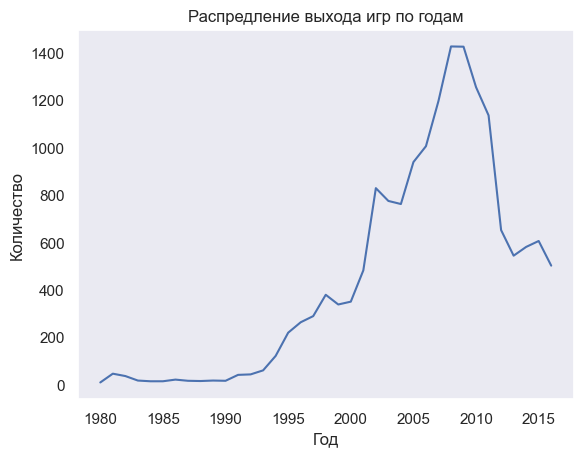

In [185]:
sns.lineplot(x='year_of_release', y='games', data =games_by_year, markers=True, dashes=False)
sns.set(style='darkgrid',)
plt.title('Распредление выхода игр по годам')
plt.xlabel('Год')
plt.ylabel('Количество')
plt.show()

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 В разделе предобработки данных на пропуски года релиза была поставлена заглушка, при анализе ее необходимо отфильтровывать<br> Для чего предназначена заглушка? Для сохранения значимых данных в других колонках, отличной той, в которой заменяем пропуски заглушкой. Но когда анализируем данные колонки с заглушками, то последнюю отфильтровываем, так как эти данные не валидны. Если этого не делаем, то получается, что не совсем правильно понимаем назначение заглушки. Для учебного проекта это не очень критично, а в реальном или тестовом задании потенциального работодателя это показатель не полного понимания работы с данными.</font>

<font color='Blue'>Исправил. Удалил заглушку.</font><br>

График наглядно цитирует цифры. 1970г - не принимаем в расчет ибо там оказались все бездатные игры. Рост числа новинок в игровой индустрии шел до 2008 года, а дальше начался спад. Не исключено, что это был количественно\качественный переход.

Посмотрим как менялись продажи по платформам

In [186]:
games_by_platform = data.pivot_table(index=['year_of_release'], values=['total_sales'], aggfunc='sum', columns='platform')
games_by_platform = games_by_platform.droplevel(0, axis=1)
display(games_by_platform)

platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,,
1980,11.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981,35.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1982,28.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1983,5.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984,0.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985,0.45,NaN,NaN,NaN,0.02,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986,0.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987,1.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988,0.74,NaN,NaN,NaN,NaN,1.43,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Кажется тут напрашивается тепловая карта

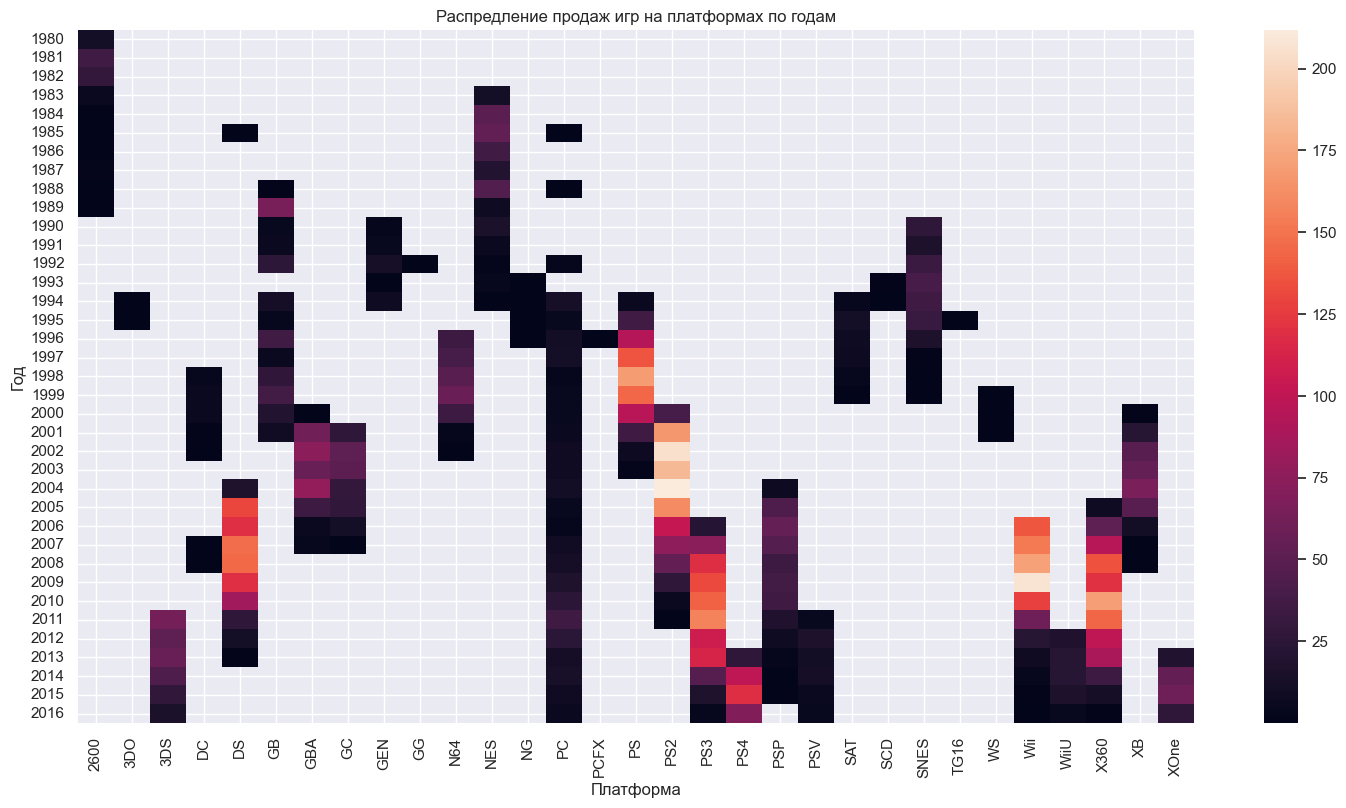

In [187]:
fig, ax = plt.subplots(figsize=(18, 9))
sns.set(style='dark',)
sns.heatmap(games_by_platform)
plt.title('Распредление продаж игр на платформах по годам')
plt.xlabel('Платформа')
plt.ylabel('Год')
#plt.legend() 
plt.show()

По графику видны платформы лидеры продаж это: DS, PS, PS2, PS3, PS4, Wii и X360. Однако, нужно заметить PC платформу, хотя она и не может похвастаться крупными продажами в каком-то году, но продажи почти непрерывны. Судя по графику платформы живут +- 10 лет. На мой взгляд, в данных присутствуют аномалии, например игровая платформа Nintendo DS. Год ее выпуска 2004, но мы видем продажи по этой платформе в 1985 году. Это скорее всего опечатка\ошибка ввода. ~~И данные из "1970" года мы могли бы приблизительно вернуть в строй заменив его средним по диапазону выхода игр для каждой конкретной платформы.~~

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, что нашли ошибку с платформой DS. Там всего одна игра в 1985 году, но в этом году данной платформы не существовало, явно ошибка.</font>

~~Стало нестерпимо жалко данные по играм, у которых не указан год выхода, и я решил им присвоить год средний из диапазона выхода игр для платформы. Т.е., к примеру, платформа 3DS получала новые игры с 2011 по 2016. Возьму среднее и скруглю до целого в большую сторону. Метод ощущается так себе, поэтому сохраню его в отдельный датафрейм, вдруг пригодится дальше.~~

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 Зачем получать среднюю "температуру" по "больнице" по пропускам года релиза. Кроме того, каждая платформа имеет срок жизни на рынке, сделав такую замену в датасете появляются игры на платформе, которой в данный год уже не было. Пропусков всего 1,6%, удалить их и забыть. И обработку пропусков необходимо делать не в исследовательском анализе, а в разделе предобработки данных.</font>

In [188]:
data_assum_year = data
'''Закоментирую свой "измеритель по больнице" =) 
А присвоение оставлю, чтобы не переписывать остальной код
for c in games_by_platform.columns:
    t = math.ceil(mean(games_by_platform[c].iloc[1:].dropna().index.tolist()))
    data_assum_year.loc[(data_assum_year['platform'] == c) & (data_assum_year['year_of_release'] == 1970), 'year_of_release'] = t
'''

'Закоментирую свой "измеритель по больнице" =) \nА присвоение оставлю, чтобы не переписывать остальной код\nfor c in games_by_platform.columns:\n    t = math.ceil(mean(games_by_platform[c].iloc[1:].dropna().index.tolist()))\n    data_assum_year.loc[(data_assum_year[\'platform\'] == c) & (data_assum_year[\'year_of_release\'] == 1970), \'year_of_release\'] = t\n'

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Если мы хотели сделать копию таблицы, то мы ошиблись. Простым присваиванием это сделать нельзя, новая переменная ссылается на тот же объект, что и исходный датасет, это видно по `id` (см.код ниже). А для создания копии надо использовать следующий метод: `df_new = df_old.copy()`. А у нас изменения в одной таблице будут повторяться в другой.</font>

In [189]:
# Комментарий ревьюера
id(data_assum_year), id(data)

(2753352809872, 2753352809872)

In [190]:
# Заремил, удалять ячейку не стал.
#display(data_assum_year.pivot_table(index=['year_of_release'], values=['total_sales'], aggfunc='sum', columns='platform'))

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Как-то не корректно определять срок жизни платформы "на глазок", его расчет из данных таблицы был бы более уместен, например, как показано ниже. Вопрос брать ли платформы всего датасета, или ограничивать периодом начала роста продаж, остается открытым, но можно поэкспериментировать.</font>

In [191]:
# Комментарий ревьюера
temp = data_assum_year.copy() 
time_life = temp.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
time_life['life'] = time_life['max'] - time_life['min'] + 1 # в срок жизни платформы, должны входить границы диапазона, 
                                                            # поэтому +1
time_life['life'].median()

7.0

В своих расчетах, опираясь на полученные данные, я пришел к выводу, что обычно срок жизни платформы около 7 лет. Поэтому для расчета на 2017 год я возьму данные за 3 года - с 2014 по 2016. Оставлю записи только о десятке лучших платформ с прибылью за последние 3 года.

In [192]:
actual_data = data_assum_year[data_assum_year['year_of_release']>=2014]
actual_platforms = actual_data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by = 'total_sales',ascending=False).head(10).index.to_list()
display(actual_platforms)
actual_data = actual_data[actual_data['platform'].isin(actual_platforms)]
display(actual_data)

['PS4', 'XOne', '3DS', 'PS3', 'X360', 'WiiU', 'PC', 'PSV', 'Wii', 'PSP']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,-1.0,NaN,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,-1.0,NaN,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,-1.0,NaN,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,-1.0,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,-1.0,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,-1.0,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,-1.0,NaN,0.01


<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 Для целей прогнозирования продаж на следующий год даже в традиционных бизнесах редко берут данные более чем за 2-3 года. А в такой динамично меняющейся индустрии, как компьютерные игры и вовсе не стоит брать слишком большой временной интервал - иначе обязательно захватим уже отжившие тренды. Но и очень короткий период не подходит для прогнозирования, так что надо выбирать золотую середину (но не менее 2-х полных лет и не более 5 лет, включая 2016 год).</font>

<font color='Blue'>Исправил. Следуя рекомендации взял 3 года.</font><br>

Получил табличку актуальных данных, в ней топ 10 платформ за 3 года.

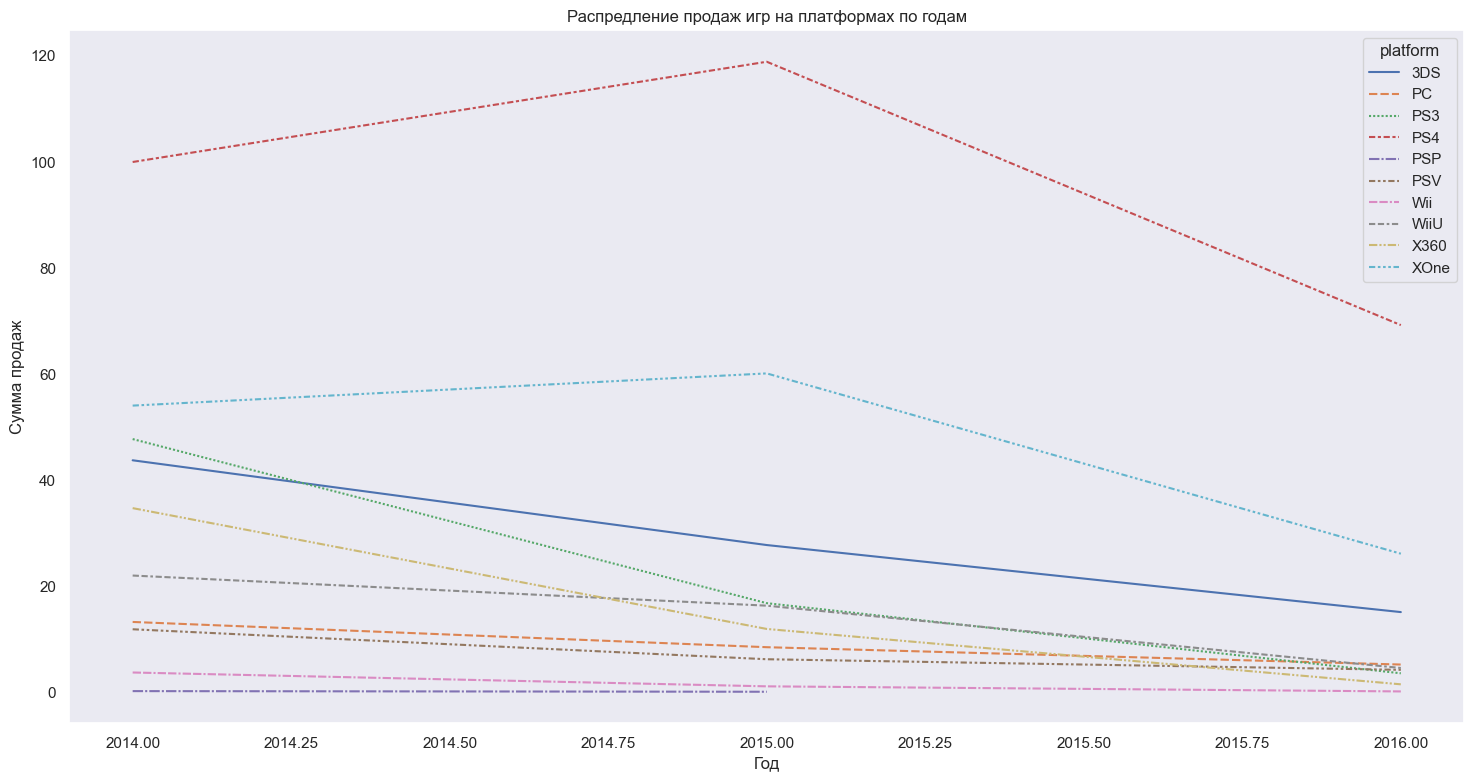

In [193]:

fig, ax = plt.subplots(figsize=(18, 9))
sns.lineplot(data=actual_data.pivot_table(index=['year_of_release'], values=['total_sales'], aggfunc='sum', columns='platform').droplevel(0, axis=1), linestyle = 'solid')
plt.title('Распредление продаж игр на платформах по годам')
plt.xlabel('Год')
plt.ylabel('Сумма продаж')
plt.show()

То есть по графикам виден спад продаж на всех платформах. В эти года в Европе был миграционный кризис, а по всему миру прокатилась серия терактов. Может быть это стало причиной спада, но моежт быть причиной был банальный кризис отрасли. Только две платформы имели положительную динамику с 2014 по 2015 год, это XBoxOne и PS4. У Nintenod 3DS хотя и отрицательная динамика, но абсолютные значения позволяют ее включить в тройку перспективных платформ на 2017 год. 

Построю график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

In [194]:
display(actual_data)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,-1.0,NaN,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,-1.0,NaN,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,-1.0,NaN,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,-1.0,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,-1.0,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,-1.0,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,-1.0,NaN,0.01


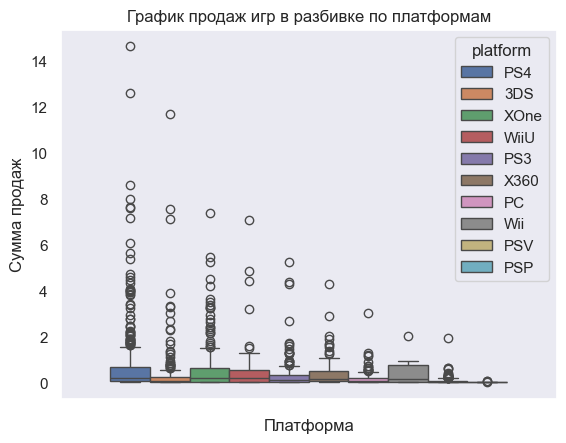

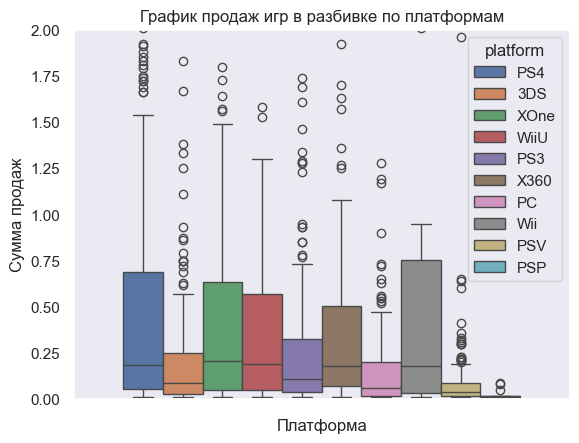

In [207]:
#sns.boxplot(data = actual_data.pivot_table(index=['year_of_release'], columns='platform', aggfunc='sum', values='total_sales'))
sns.boxplot(data=actual_data, y='total_sales', hue='platform')
plt.title('График продаж игр в разбивке по платформам')
plt.xlabel('Платформа')
plt.ylabel('Сумма продаж')
plt.show()

sns.boxplot(data=actual_data, y='total_sales', hue='platform')
plt.title('График продаж игр в разбивке по платформам')
plt.ylim((0,2))
plt.xticks( rotation= 60)
plt.xlabel('Платформа')
plt.ylabel('Сумма продаж')
plt.show()

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 Почему диаграмма размаха строится по сводной таблице, которая агрегирует данные? Необходимо отразить продажи по каждой проданной игре каждой платформы.<br>
Только диаграммы надо строить в двух видах, одна со всеми вылетами, вторая масштабированная, что бы были крупно видны боксплоты и, соответственно, квантили и медианы. Для этого надо использовать параметр ylim().</font>
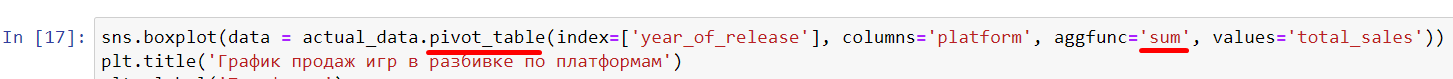
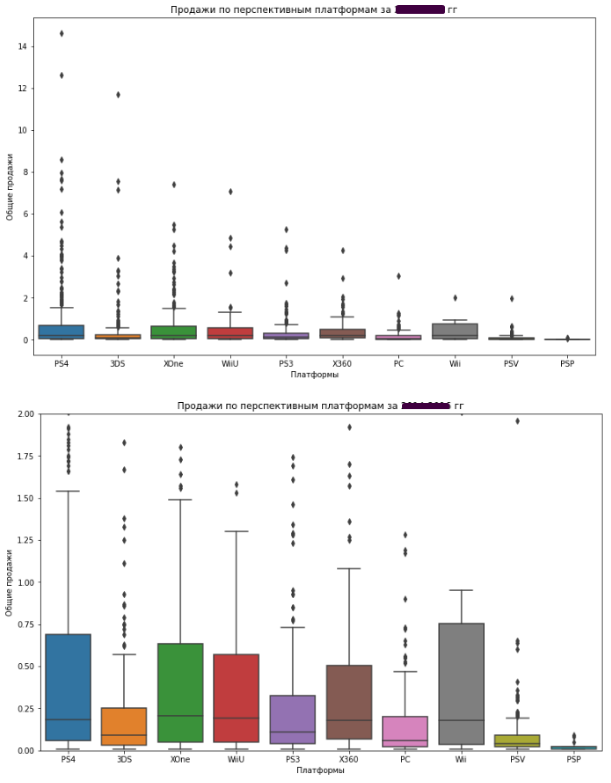

<font color='Blue'>Спасибо за рекомендацию. Не правильно понял задачу. Исправил.</font><br>

~~PS3 и X360 имеют самые широкие квартильные размахи, а медианы находятся практически по центру. График PS4 имеет большую плотность данных. Выбросы наблюдаются только у Wii и WiiU.~~

На первом графике мы видем, что выбросы больше самих графиков. И тело графиков лежит в диапазоне от 0 до 1.

Второй график, с ограничением по оси ординат показывает, что медианы всех графиков смещены к меньшим значениям, это говорит о том, что подавляющая сумма продаж не велика. 

Построю диаграмму рассеяния для отзывов пользователей и критиков для трех популярных платформ.

In [196]:
display(actual_data['critic_score'].max())
actual_data['critic_score'] = actual_data['critic_score'] / 10

97.0

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Не однозначное решение делить отзывы критиков на десять. Если только диаграммы рассеяния строить в одних координатах. Но там будем плохо видно. </font>

Text(0.5, 0.98, 'Диаграммы распеделения продаж от оценок критиков')

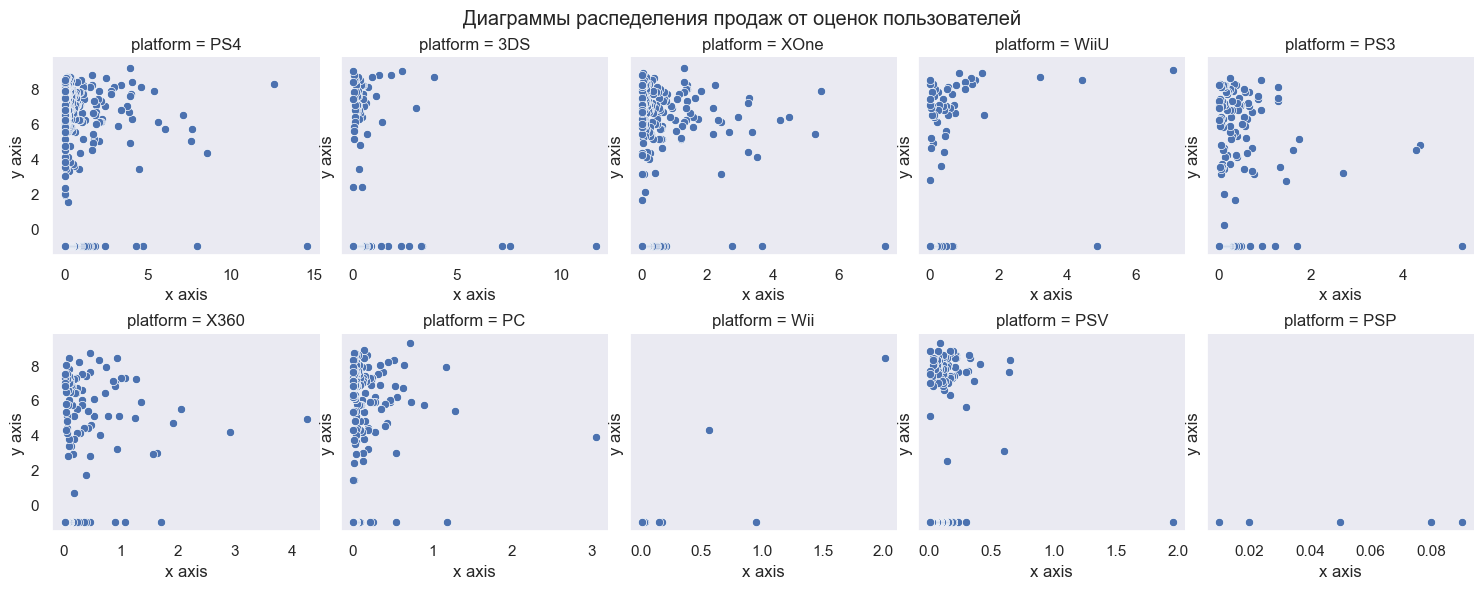

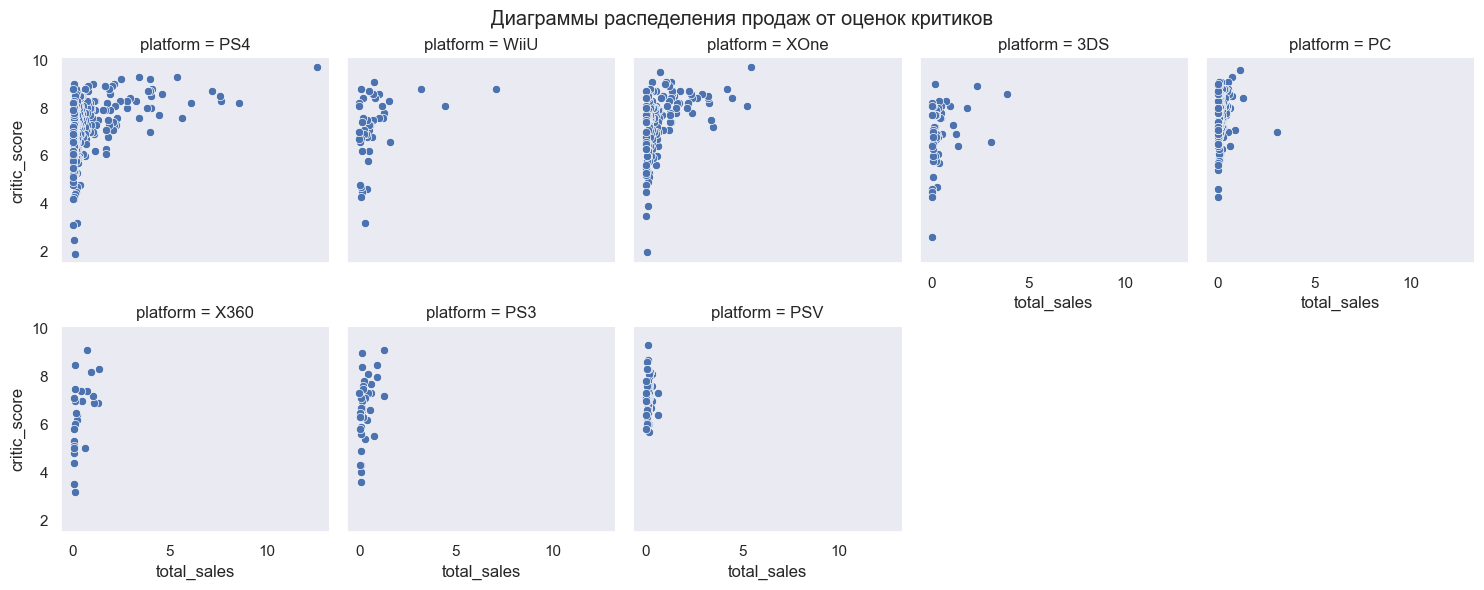

In [214]:
g = sns.FacetGrid(actual_data[actual_data['user_score'].notna()], col='platform', col_wrap=5, sharex=False)
g.map(sns.scatterplot, 'total_sales', 'user_score')

g.fig.suptitle('Диаграммы распеделения продаж от оценок пользователей')
for ax in g.axes.flat:
     ax.set_xlabel('x axis', visible=True)
     ax.set_ylabel('y axis', visible=True)
plt.subplots_adjust(top=0.94, wspace=None, hspace=0.4)
g.fig.subplots_adjust(top=0.9)
g = sns.FacetGrid(actual_data[actual_data['critic_score'].notna()], col='platform', col_wrap=5)
g.map(sns.scatterplot, 'total_sales', 'critic_score')
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Диаграммы распеделения продаж от оценок критиков')

In [198]:
for p in actual_data['platform'].unique():
    print(f'Расчет корелляции для платформы {p}:')
    if actual_data['total_sales'].corr(actual_data[actual_data['critic_score'].notna()]['total_sales']) < 0.5:
        print(f'Связь между оценками критиков и продажами не прослеживается.')
    else:
        print(f'Связь между оценками критиков и продажами присутствует.') 
    if actual_data['total_sales'].corr(actual_data[actual_data['user_score'].notna()]['total_sales']) < 0.5:
        print(f'Связь между оценками пользователей и продажами не прослеживается.')
    else:
        print(f'Связь между оценками пользователей и продажами присутствует.')
    print('============================================')

Расчет корелляции для платформы PS4:
Связь между оценками критиков и продажами присутствует.
Связь между оценками пользователей и продажами присутствует.
Расчет корелляции для платформы 3DS:
Связь между оценками критиков и продажами присутствует.
Связь между оценками пользователей и продажами присутствует.
Расчет корелляции для платформы XOne:
Связь между оценками критиков и продажами присутствует.
Связь между оценками пользователей и продажами присутствует.
Расчет корелляции для платформы WiiU:
Связь между оценками критиков и продажами присутствует.
Связь между оценками пользователей и продажами присутствует.
Расчет корелляции для платформы PS3:
Связь между оценками критиков и продажами присутствует.
Связь между оценками пользователей и продажами присутствует.
Расчет корелляции для платформы X360:
Связь между оценками критиков и продажами присутствует.
Связь между оценками пользователей и продажами присутствует.
Расчет корелляции для платформы PC:
Связь между оценками критиков и прода

In [199]:
''' Свою писанину из прошлой версии не удаляю, а закоментирую.
Если для проверке удобнее удалять пожалуйста сообщи - буду удалять.
top_platforms = ['Wii', 'PS4', 'X360', 'XOne', ]
for p in top_platforms:
    #display(actual_data.loc[actual_data['platform'] == p].melt(id_vars=['total_sales'], value_vars=['user_score', 'critic_score']))
    #df_melted = actual_data.loc[(actual_data['platform'] == p)].melt(id_vars=['total_sales'], value_vars=['user_score', 'critic_score']).dropna(subset='value')
    sns.scatterplot(data = df_melted, x='total_sales', y='value', hue='variable')
    plt.title('Диаграмма распеделения продаж от оценок для платформы ' + p)
    plt.xlabel('Сумма продаж')
    plt.ylabel('Рейтинг')
    plt.show()
    if df_melted['total_sales'].corr(df_melted['value']) < 0.5:
        print(f'Связь для платформы {p} между оценками и продажами не прослеживается')
    else:
        print(f'Для платформы {p} наблюдается взаимосвязь между продажами и оценками')
'''

" Свою писанину из прошлой версии не удаляю, а закоментирую.\nЕсли для проверке удобнее удалять пожалуйста сообщи - буду удалять.\ntop_platforms = ['Wii', 'PS4', 'X360', 'XOne', ]\nfor p in top_platforms:\n    #display(actual_data.loc[actual_data['platform'] == p].melt(id_vars=['total_sales'], value_vars=['user_score', 'critic_score']))\n    #df_melted = actual_data.loc[(actual_data['platform'] == p)].melt(id_vars=['total_sales'], value_vars=['user_score', 'critic_score']).dropna(subset='value')\n    sns.scatterplot(data = df_melted, x='total_sales', y='value', hue='variable')\n    plt.title('Диаграмма распеделения продаж от оценок для платформы ' + p)\n    plt.xlabel('Сумма продаж')\n    plt.ylabel('Рейтинг')\n    plt.show()\n    if df_melted['total_sales'].corr(df_melted['value']) < 0.5:\n        print(f'Связь для платформы {p} между оценками и продажами не прослеживается')\n    else:\n        print(f'Для платформы {p} наблюдается взаимосвязь между продажами и оценками')\n"

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 Ну вот, ошибка кода. Вынужден прервать проверку. 😢<br>Хочу сразу предупредить, что анализ отзывов необходимо делать миниммум по пяти платформах, постноить на отзедлных координатных сетках диаграммы рассеяния по обоим видам отзывов и посчитать корреляцию.</font>
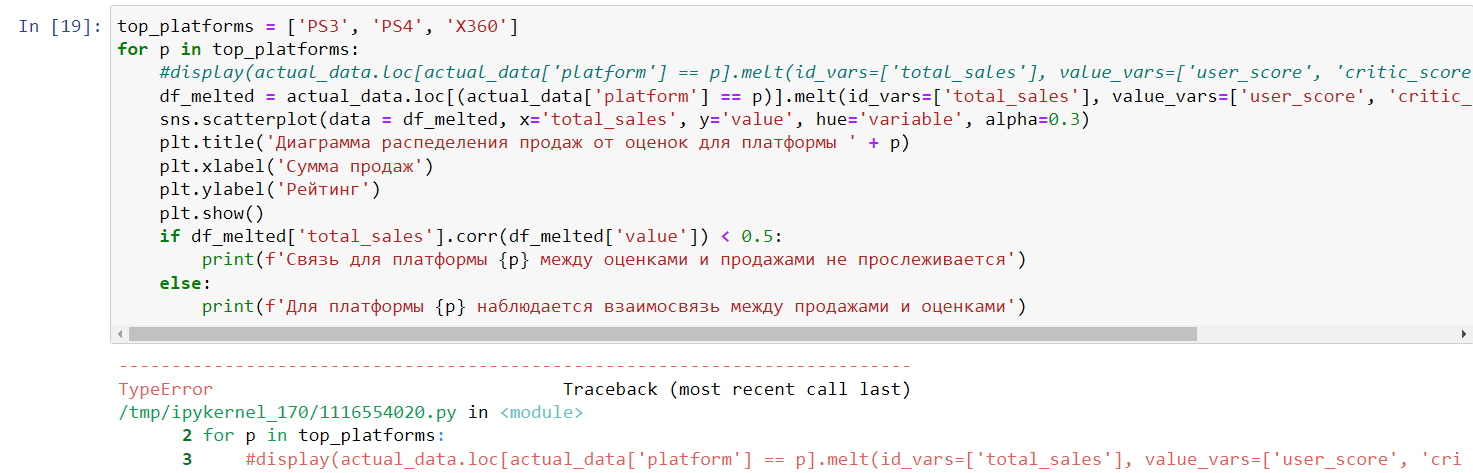

Вычисления указывают на то, что взаимосвязь между оценками критиков и пользователей положительно влияет на продажи.

Вычислю соотношение продаж по жанрам. 

,sum
genre,
Action,199.36
Shooter,170.94
Sports,109.48
Role-Playing,101.44


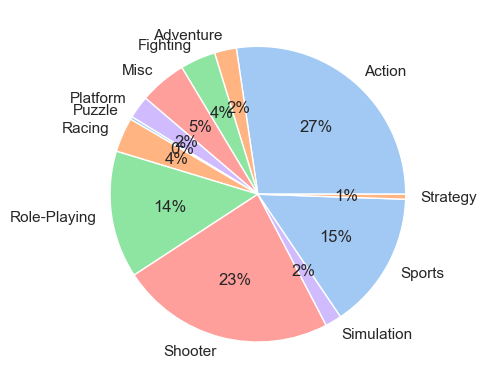

In [200]:
pie = actual_data.groupby(['genre']).agg({'total_sales': ['sum']}).droplevel(0, axis=1)
display(pie.sort_values(by=['sum'], ascending= False).head(4))
colors = sns.color_palette('pastel')[ 0:5 ]
plt.pie(pie['sum'], labels = pie.index.to_list(), colors = colors, autopct='%.0f%%')
plt.show()

Тут все кристально ясно: лидеры отрасли это Action, Shooter, Sports и RPG. А аутсайдеров больше в 2 раза.  

Вычислю ТОП 5 платформ и жанров для регионов NA, EU и JP

In [201]:
for p in ['platform', 'genre']:
    for v in ['na_sales', 'eu_sales', 'jp_sales']:
        if p == 'platform':
            print(f"Топ 5 платформ для региона {v.split('_')[0].upper()}:\
{actual_data.pivot_table(index=p, values=v, aggfunc='sum').head(5).sort_values(by=v, ascending=False).index.to_list()}")
        if p == 'genre':
            print(f"Топ 5 жанров для региона {v.split('_')[0].upper()}:\
{actual_data.pivot_table(index=p, values=v, aggfunc='sum').head(5).sort_values(by=v, ascending=False).index.to_list()}")


Топ 5 платформ для региона NA:['PS4', '3DS', 'PS3', 'PC', 'PSP']
Топ 5 платформ для региона EU:['PS4', 'PS3', 'PC', '3DS', 'PSP']
Топ 5 платформ для региона JP:['3DS', 'PS4', 'PS3', 'PSP', 'PC']
Топ 5 жанров для региона NA:['Action', 'Misc', 'Fighting', 'Platform', 'Adventure']
Топ 5 жанров для региона EU:['Action', 'Misc', 'Platform', 'Fighting', 'Adventure']
Топ 5 жанров для региона JP:['Action', 'Fighting', 'Misc', 'Adventure', 'Platform']


Из всего обилия разнообразия выделятся только Японский регион своей привязанностью к продукции компании Nintendo. Патриотично.

,eu_sales,jp_sales,na_sales,other_sales
rating,,,,
E,58.0,9.0,51.0,15.0
E10+,26.0,4.0,33.0,8.0
M,93.0,8.0,96.0,29.0
T,34.0,15.0,39.0,11.0


<Axes: ylabel='rating'>

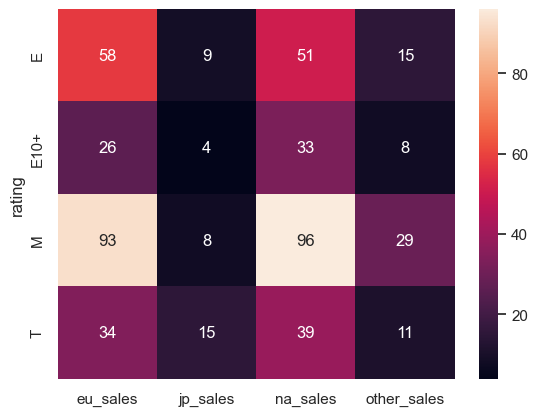

In [202]:
#display(actual_data[actual_data['rating'].notnull()])
t = actual_data.pivot_table(index='rating', values=['na_sales',	'eu_sales',	'jp_sales',	'other_sales'], aggfunc='sum')
display(t.round())
sns.heatmap(t.round(), annot=True, fmt='g')


На Японский регион сильного значения рейтинг не влияет (что логично ибо Япония использует свой стандарт - CERO), а между Европейскими и Североамериканскими продажами игр в разрезе наблюдается закономерность: самый популярный рейтинг - М (что так же логично - масса людей возрастом 17+ подавляюще бОльшая), на втором месте - Е, третье место поделили Т и Е10. На продажи в "Других" регионах рейтинг так же не оказывает, скорее всего по причине того что там он не используется.

##### Проверка гипотез

а. Проверю гипотезу о равенсте средний пользовательских рейтингов для платформ Xbox One и PC.

Для проверки сформирую две гипотезы:
- Нулевая гипотеза - средние пользовательские рейтинги для платформ Xbox One и PC равны.
 
- Альтернативная гипотеза - средние пользовательские рейтинги для платформ Xbox One и PC не равны.

In [206]:
alpha = 0.01
results = st.stats.ttest_ind(actual_data[(actual_data['platform'] == 'X360') & (actual_data['user_score'] >= 0)]['user_score'], 
                             actual_data[(actual_data['platform'] == 'PC') & (actual_data['user_score'] >= 0)]['user_score'])
print(f'p-value: {results.pvalue}')
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 0.030983578725445982
Нет оснований отвергнуть нулевую гипотезу


C:\Users\abrik\AppData\Local\Temp\ipykernel_31988\2408884734.py:2: DeprecationWarning: Please use `ttest_ind` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  results = st.stats.ttest_ind(actual_data[(actual_data['platform'] == 'X360') & (actual_data['user_score'] >= 0)]['user_score'],


Я не отвергаю нулевую гипотезу о том, что пользовательские рейнинги для платформ Xbox One и PC равны.

b. Проверю следующую гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports разные.

Для проверки сформирую две гипотезы:

 - нулевая - средние пользовательские рейтинги жанров Action и Sports равны
 - альтернативная - средние пользовательские рейтинги жанров Action и Sports **не** равны

In [205]:
alpha = 0.01
results = st.stats.ttest_ind(actual_data[(actual_data['genre'] == 'Action') & (actual_data['user_score'] >= 0)]['user_score'], 
                             actual_data[(actual_data['genre'] == 'Sports') & (actual_data['user_score'] >= 0)]['user_score'])
print(f'p-value: {results.pvalue}')
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 2.8711147985105864e-19
Отвергаем нулевую гипотезу


C:\Users\abrik\AppData\Local\Temp\ipykernel_31988\3675419637.py:2: DeprecationWarning: Please use `ttest_ind` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  results = st.stats.ttest_ind(actual_data[(actual_data['genre'] == 'Action') & (actual_data['user_score'] >= 0)]['user_score'],


В этом случае предположение высказанное в условии так же подтвердилось. Средние пользовательские рейтинги для Action и Sports вероятнее всего не равны.

#### Итоговый вывод

Для выполнения исследования я воспользовался библиотеками: 
- pandas
- scipy
- seaborn
- matplotlib
- statistics 
- math
##### Предобработка данных
На входе, для исследования мною был получен файл с данными клиентов интернет-магазина «Стримчик». Данные охватывают период продаж игр магазином с 1980 по 2016 года. В ходе работы данные из файла были загружены и проанализированы. Выяснилось, что пропуски в указании года выхода составляют 1,6%. Они будут удалены. Данные пользовательского рейтинга содержат пропуски и записи “tbd” (будут заполнены позже) их я заменил на -1. Данные были проверены на наличие дубликатов и очищенны от них. Были изменены записи категории возрастного рейтинга на соответствующие актуальные. Данные в столбце ‘year_of_release’ имели формат числа с плавающий точкой, хотя содержали целочисленные данные, а ‘user_score’ имеел формат ‘object’ при хранении в нем чисел с плавающей точкой. Я привел типы вышеуказанных столбцов к их корректным типам данных. Следующим шагом я обработал пропуски в остальных столбцах, они оказались в перечне (name, genre, critic_score, rating). Удалил записи для genre, а они совпали и с name. Дополнил данные столбцом ‘total_sales’ в котором хранятся суммы продаж во всех регионах для каждой игры.
##### Исследовательский анализ данных.
Провожу анализ выхода игр по годам и визуализирую это. Выяснилось, что продажи активно росли до 2008 года, а далее, до конца имеющихся данных был нисходящий тренд. 
Следующим этапом я исследую распределение в разрезе платформа\год. Получив сводную таблицу, визуализирую ее с помощью тепловой карты. Она указывает мне на лидеров отрасли за последние годы, ими стали DS, PS, PS2, PS3, PS4, Wii и X360. Далее я сформировал таблицу актуальных данных ‘actual_data’. За актуальные я принял данные за последние 3 года. В эти данные попали записи только топ 10 платформ за этот период.
По полученному датафрейму я строю график продаж для каждой платформы. Из него я сделал вывод, что общая тенденция рынка видеоигр идет на спад. Лучшими по графику являются XBoxOne, PS4 и Nintenod 3DS. 
Необходимо проверить взаимосвязь между продажами и оценками пользователей и критиков. Чтобы это выполнить я построил соответствующие графики и вычислил корреляцию. Все эти исследования указали на наличие взаимосвязи продаж как между оценками пользователей так и оценками критиков.
Посредством метода groupby я вычислил соотношение продаж по жанрам и для наглядности построю круговую диаграмму. Лидерами оказались Action, Shooter, Sports и RPG.
Вычислив ТОП 5 платформ и жанров для регионов NA, EU и JP я делаю вывод, что в этих регионах тройка самых прибыльных игр выходит в жанрах Action, Misc и Platform на PS3, PS4 или 3DS. 
Далее я рассмотрел влияние рейтинга ESRB на продажи в разных регионах. Для наглядности я построил тепловую карту на основе полученных вычислений. Оказывается, что рейтинг влияет на продажи Североамериканского и Европейского регионов. Для них тройка популярных рейтингов распределена так: М, Е, а третье место делят Т и Е10.
##### Проверка гипотез
В задании были изложены две гипотезы:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action и Sports разные.
В результате использования метода ttest_ind для проверки вышеуказанных гипотез получил результаты:
1. первая гипотеза:
 - Нулевая гипотеза - средние пользовательские рейтинги для платформ Xbox One и PC равны.
 
 - Альтернативная гипотеза - средние пользовательские рейтинги для платформ Xbox One и PC не равны.
результат: p-value: 0.030983578725445982
Нет оснований отвергнуть нулевую гипотезу

2. вторая гипотеза:
 - нулевая - средние пользовательские рейтинги жанров Action и Sports равны
 - альтернативная - средние пользовательские рейтинги жанров Action и Sports **не** равны
результат: p-value: 2.8711147985105864e-19
Отвергаем нулевую гипотезу

Подводя итог можно рекомендовать акцентировать внимание в 2017 году на играх в жанрах Action, Misc и Platform с рейтингами М и Е для платформ PS3, PS4 или 3DS.



<font color='DarkBlue'><b>Заключительный комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Дмитрий!<br></font>
<font color='Red'>🛠 Увы, должен прервать ревью из-за ошибки в коде. Настоятельно рекомендую перед отправкой проекта на ревью проверять в JupyterHub исполнение кода тетрадки.<br>
Необходимо исправить ошибки, в том числе уже обнаруженные:<br>
Необходимо сделать описание проекта. Сделать проверку явных и неявных дубликатов. Сделать правильную обработку оценок пользователей tbd и пропусков в отзывах пользователей. Сделать выводы по разделу предобработки данных. Переделать обработку пропусков по годам релиза. Выбрать меньший актуальный период для прогнозирования. Переделать построение графика «ящик с усами» по глобальным продажам игр в разбивке по платформам.<br>
Жду исправленный проект. Если будут трудности, можно обратиться к куратору. </font>